In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
from tqdm import trange
from gensim import corpora, models

from sklearn.feature_extraction.text import CountVectorizer

In [2]:
data = pd.read_csv('data_output.csv')

In [3]:
data.head(3)

,Unnamed: 0.1,Unnamed: 0,comments,Preprocessed,NB Predict,KNN Predict
0,0,0,Daniel is really cool. The place was nice and ...,daniel really cool place nice clean quiet neig...,Positive,Positive
1,1,1,If you want the authentic Amsterdam houseboat ...,want authentic amsterdam houseboat experience ...,Positive,Positive
2,2,2,Unique and luxurious to be sure. I couldn't re...,unique luxurious sure couldnt recommend stayin...,Positive,Positive


In [4]:
data = data.drop(['Unnamed: 0.1','Unnamed: 0'],axis = 1)

In [5]:
data.head(2)

,comments,Preprocessed,NB Predict,KNN Predict
0,Daniel is really cool. The place was nice and ...,daniel really cool place nice clean quiet neig...,Positive,Positive
1,If you want the authentic Amsterdam houseboat ...,want authentic amsterdam houseboat experience ...,Positive,Positive


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


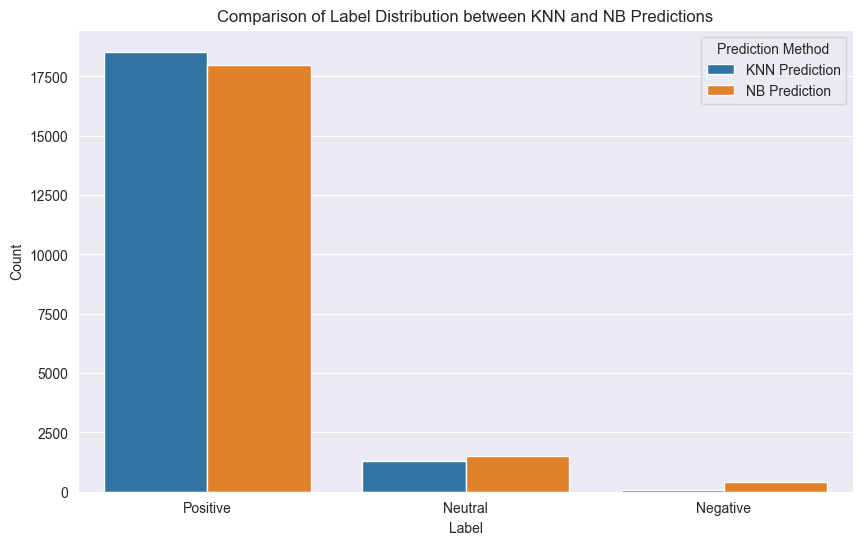

In [6]:
knn_counts = data['KNN Predict'].value_counts()
nb_counts = data['NB Predict'].value_counts()

plot_data = pd.DataFrame({'KNN Prediction': knn_counts, 'NB Prediction': nb_counts}).reset_index()
plot_data = plot_data.melt(id_vars='index', var_name='Prediction Method', value_name='Count')
plot_data.rename(columns={'index': 'Label'}, inplace=True)

# Plot menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Label', y='Count', hue='Prediction Method', data=plot_data)
plt.title('Comparison of Label Distribution between KNN and NB Predictions')
plt.xlabel('Label')
plt.ylabel('Count')
plt.legend(title='Prediction Method')
plt.show()

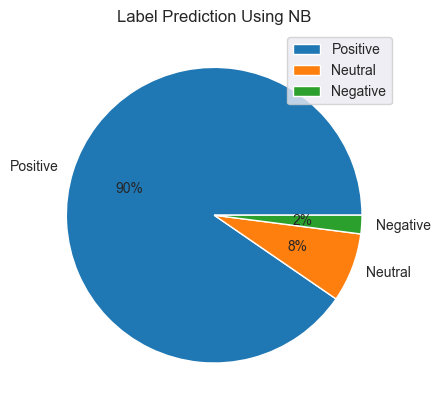

In [7]:
plt.pie(data['NB Predict'].value_counts(),labels=["Positive", "Neutral", "Negative"],autopct='%1.0f%%')
plt.title('Label Prediction Using NB')
plt.legend()
plt.show()

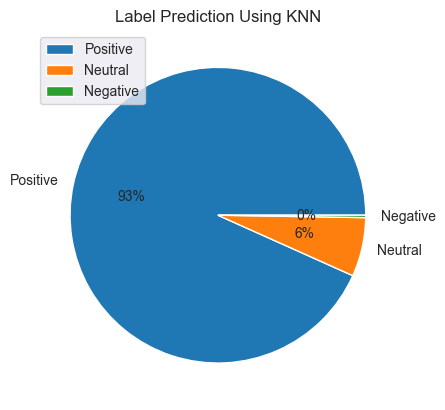

In [8]:
plt.pie(data['KNN Predict'].value_counts(),labels=["Positive", "Neutral", "Negative"],autopct='%1.0f%%')
plt.title('Label Prediction Using KNN')
plt.legend()
plt.show()

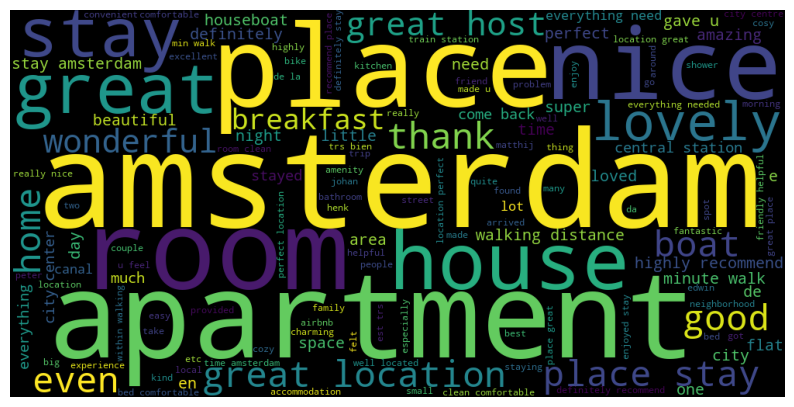

In [9]:
wc = WordCloud(width=1000, height=500 , min_font_size=12)
wc.generate(''.join(data['Preprocessed']))
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [10]:
def corpus(text):
    text_list = text.split()
    return text_list

data['Review_lits'] = data['Preprocessed'].apply(corpus)

In [11]:
corpus = []
for i in trange(data.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += data['Review_lits'][i]
len(corpus)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 19877/19877 [00:00<00:00, 102420.62it/s]


620780

In [12]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('great', 8922),
 ('amsterdam', 8263),
 ('stay', 7845),
 ('place', 7821),
 ('location', 6276),
 ('u', 5824),
 ('host', 5611),
 ('room', 5215),
 ('nice', 4764),
 ('apartment', 4330)]

In [13]:
words = [word for word, freq in mostCommon]
frequencies = [freq for word, freq in mostCommon]

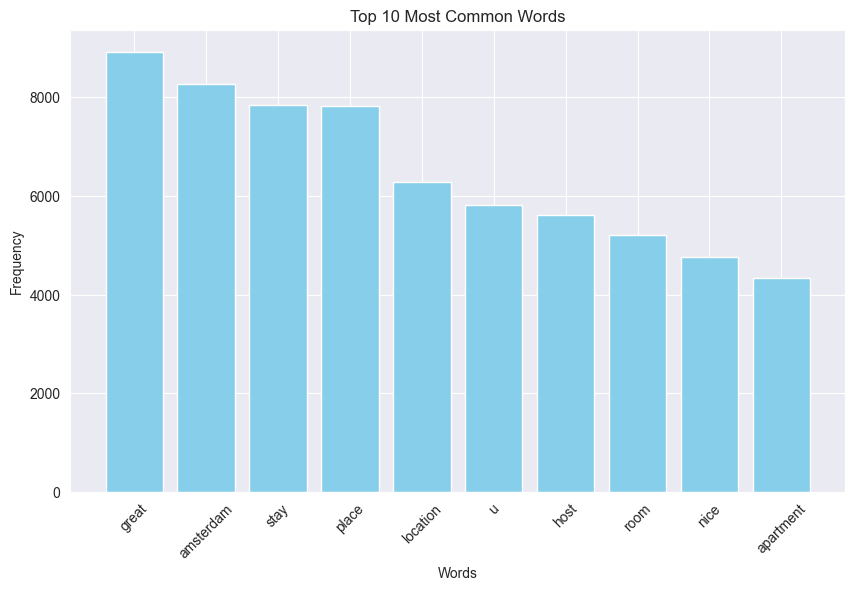

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [15]:
texts = data['Review_lits'].tolist()
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

lda_model = models.ldamodel.LdaModel(corpus=corpus,id2word=dictionary,num_topics=10,passes=10)

for i, topic in lda_model.show_topics(num_topics=10, num_words=10, formatted=False):
    print(f"Topic {i+1}: {' '.join([word[0] for word in topic])}")

Topic 1: recomendable description b cmoda uber smile facile toda justice este
Topic 2: de en een het van amsterdam te je met op
Topic 3: u amsterdam stay place great apartment city walk nice tram
Topic 4: rachel cooky honestly hop knowledgeable green appliance greatly och adam
Topic 5: great place stay location host amsterdam nice room clean recommend
Topic 6: und sehr die ist wir da war der e mit
Topic 7: e la de muy el que en un con una
Topic 8: bastian og p anfitrin ber vi til departamento det er
Topic 9: et de trs le est la un nous pour bien
Topic 10: room bathroom bed apartment stair good small shower day night


In [32]:
for i, topic in lda_model.show_topics(num_topics=10, num_words=10, formatted=False):
    print(f"Top influential words for Topic {i+1}:")
    influential_words = sorted(topic, key=lambda x: x[1], reverse=True)[:10]
    for word, weight in influential_words:
        print(f"{word}: {weight:.4f}")
    print("\n")

Top influential words for Topic 1:
recomendable: 0.0159
description: 0.0157
b: 0.0132
cmoda: 0.0091
uber: 0.0088
smile: 0.0087
facile: 0.0079
toda: 0.0077
justice: 0.0074
este: 0.0071


Top influential words for Topic 2:
de: 0.0360
en: 0.0338
een: 0.0266
het: 0.0181
van: 0.0112
amsterdam: 0.0104
te: 0.0098
je: 0.0098
met: 0.0090
op: 0.0087


Top influential words for Topic 3:
u: 0.0213
amsterdam: 0.0172
stay: 0.0150
place: 0.0146
great: 0.0123
apartment: 0.0107
city: 0.0100
walk: 0.0079
nice: 0.0079
tram: 0.0076


Top influential words for Topic 4:
rachel: 0.0127
cooky: 0.0108
honestly: 0.0098
hop: 0.0090
knowledgeable: 0.0087
green: 0.0086
appliance: 0.0075
greatly: 0.0068
och: 0.0067
adam: 0.0055


Top influential words for Topic 5:
great: 0.0485
place: 0.0383
stay: 0.0344
location: 0.0338
host: 0.0322
amsterdam: 0.0221
nice: 0.0219
room: 0.0211
clean: 0.0206
recommend: 0.0186


Top influential words for Topic 6:
und: 0.0511
sehr: 0.0295
die: 0.0276
ist: 0.0269
wir: 0.0205
da: 0.0192

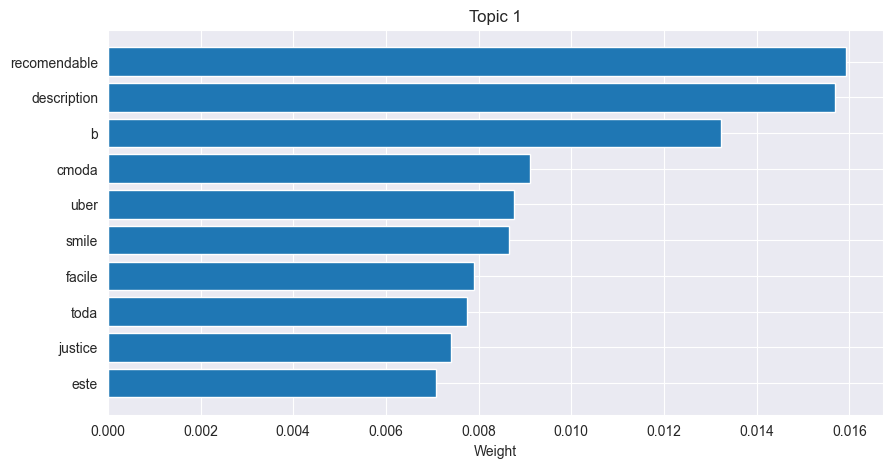

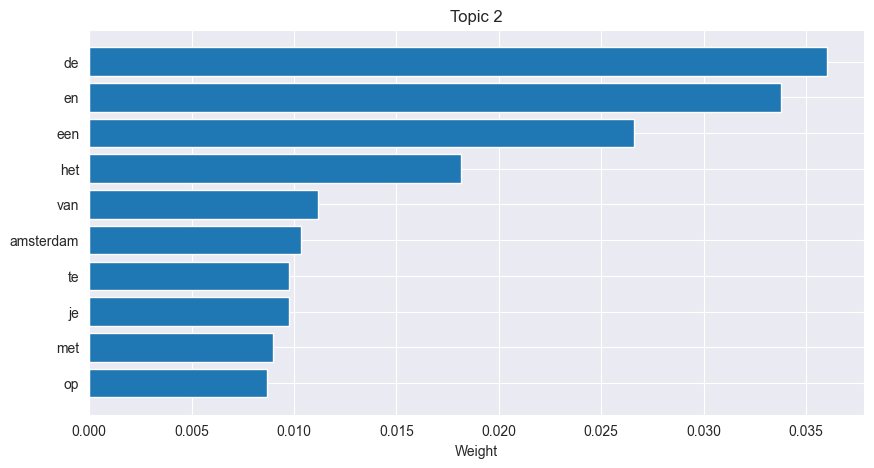

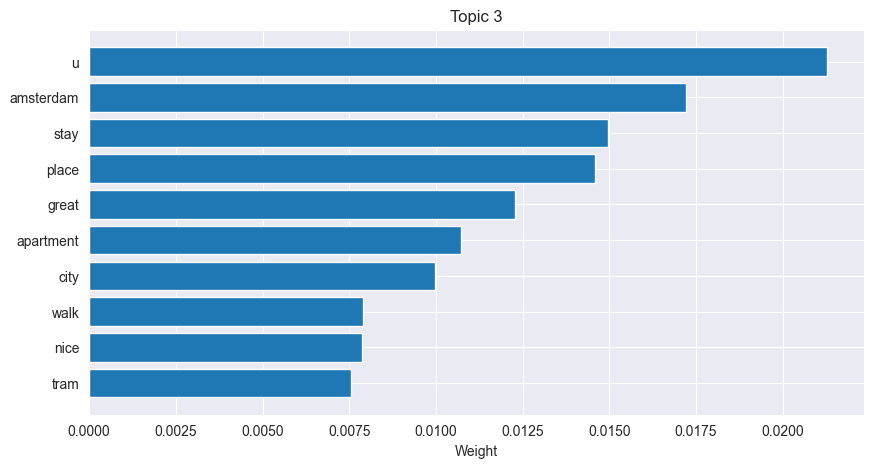

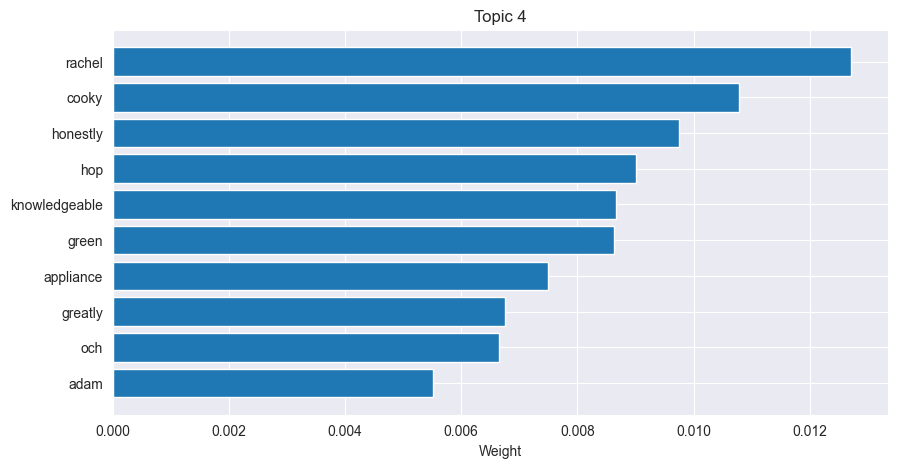

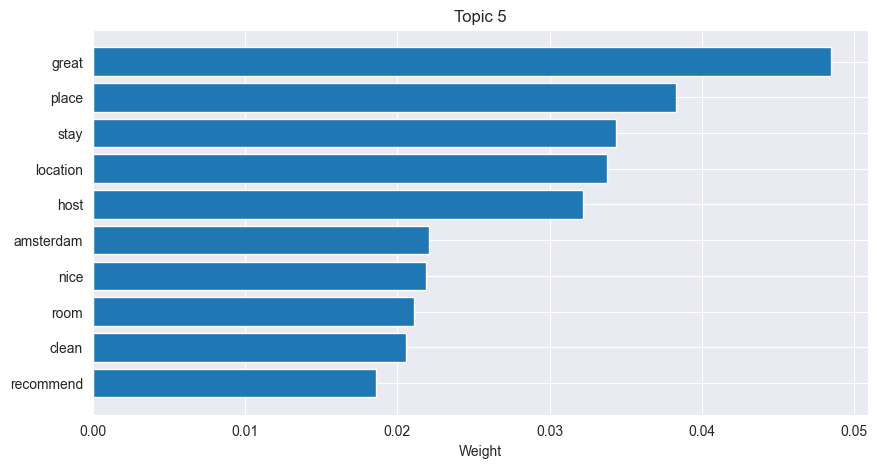

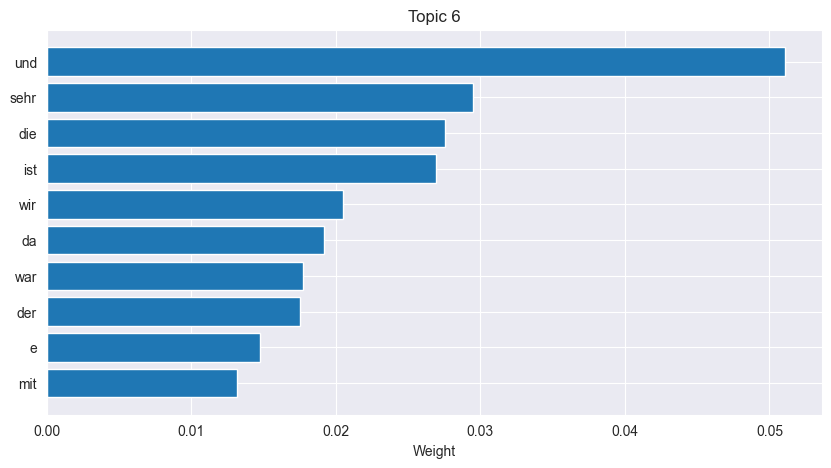

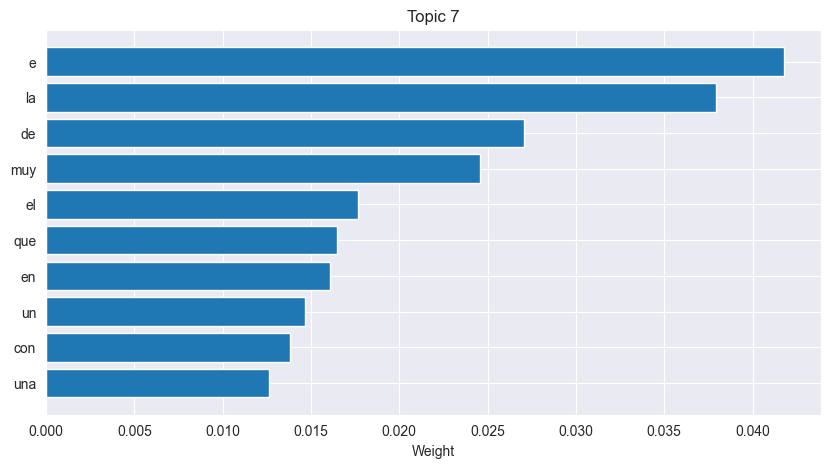

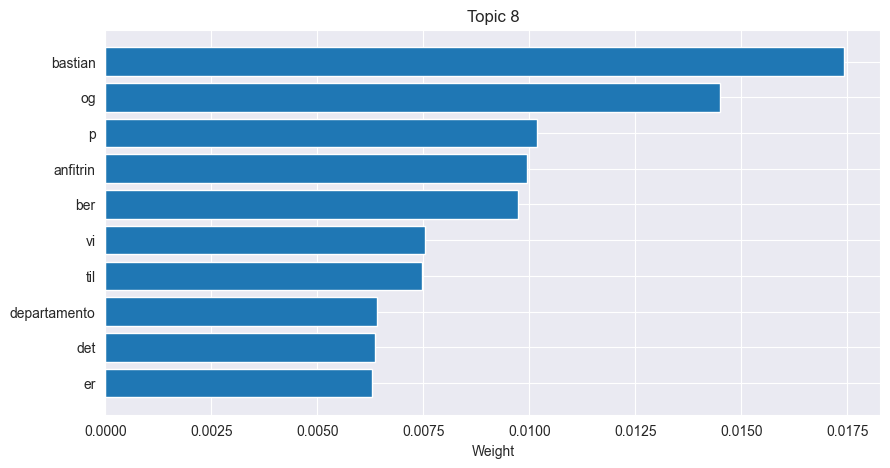

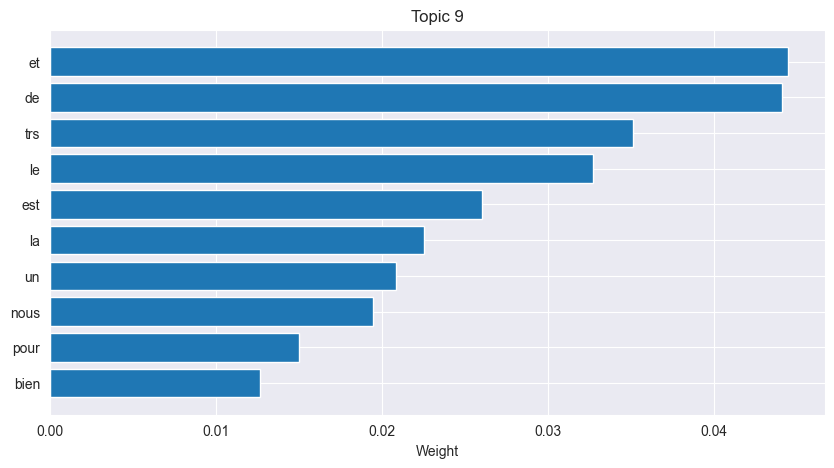

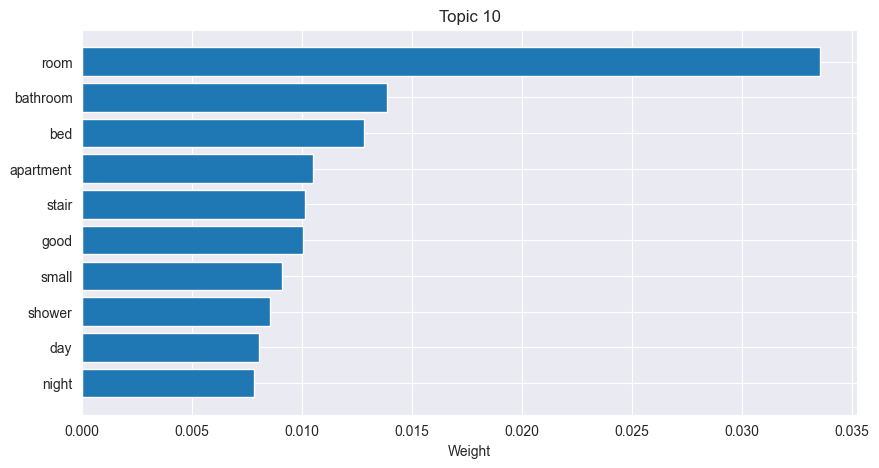

In [33]:
top_n_words = 10
for i, topic in lda_model.show_topics(num_topics=10, num_words=top_n_words, formatted=False):
    words, weights = zip(*topic)
    plt.figure(figsize=(10, 5))
    plt.barh(range(len(words)), weights, align='center')
    plt.yticks(range(len(words)), words)
    plt.gca().invert_yaxis()
    plt.xlabel('Weight')
    plt.title(f'Topic {i+1}')
    plt.show()

In [16]:
import numpy as np

cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(data['Preprocessed'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]


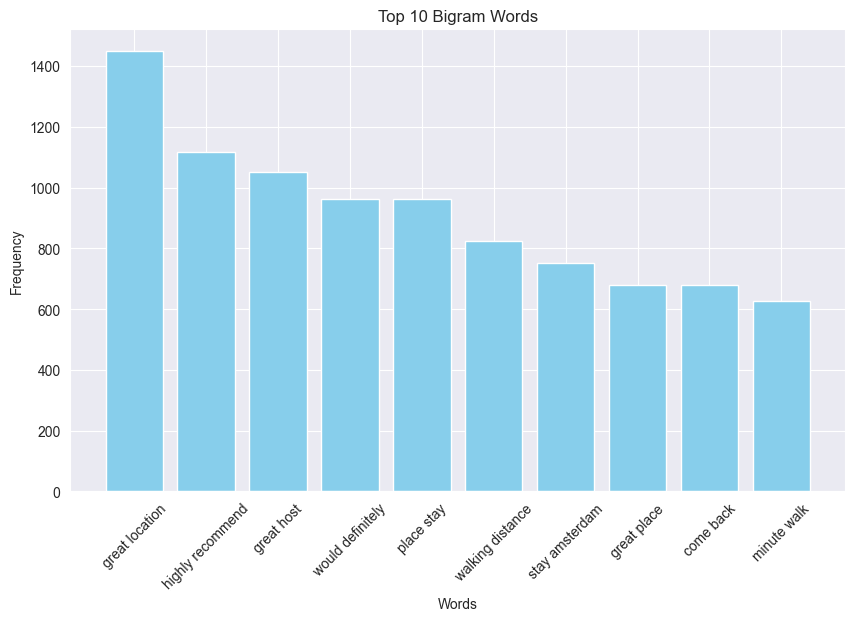

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(ngram_freq.ngram.iloc[:10], ngram_freq.frequency.iloc[:10], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Bigram Words')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()